# Proyecto EDA

## Análisis específicos

1) Copia de la Base de Datos

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar la base de datos
file_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\data\Netflix_Movies_and_TV_Shows_cleaned.csv"
netflix_data = pd.read_csv(file_path)

# Crear una copia de la base de datos
data = netflix_data.copy()

# Mostrar las primeras filas para confirmar
print("Primeras 20 filas de la copia:")
print(data.head(20))

Primeras 20 filas de la copia:
       Title     Type        Genre  Release Year Rating  Duration  \
0    Title 1  TV Show       Comedy          1955     PG      1800   
1    Title 2  TV Show       Horror          2020      G      1800   
2    Title 3  TV Show       Action          1966  TV-PG       140   
3    Title 4    Movie     Thriller          2011  PG-13       141   
4    Title 5  TV Show      Romance          1959  TV-14       172   
5    Title 6    Movie       Action          2007  PG-13       141   
6    Title 7    Movie      Romance          1977  TV-14        68   
7    Title 8    Movie       Comedy          1971  TV-PG       104   
8    Title 9    Movie        Drama          2000  PG-13       141   
9   Title 10    Movie     Thriller          1975  TV-MA       141   
10  Title 11  TV Show      Romance          2021  TV-14       139   
11  Title 12  TV Show       Action          1986  PG-13        85   
12  Title 13    Movie  Documentary          1997      R       129   
13 

## Hipótesis Principal

### Los géneros más populares en películas son distintos de los géneros más populares en programas de TV.

Análisis y Código:

- Contaremos los géneros más frecuentes en Movies y TV Shows por separado.
- Compararemos las frecuencias de géneros entre ambos tipos.

Géneros más frecuentes en películas:
Genre
Thriller       209
Romance        202
Horror         200
Drama          189
Comedy         180
Action         173
Documentary    172
Sci-Fi         148
Name: count, dtype: int64

Géneros más frecuentes en programas de TV:
Genre
Horror         198
Documentary    197
Sci-Fi         197
Action         194
Drama          189
Comedy         189
Thriller       189
Romance        174
Name: count, dtype: int64


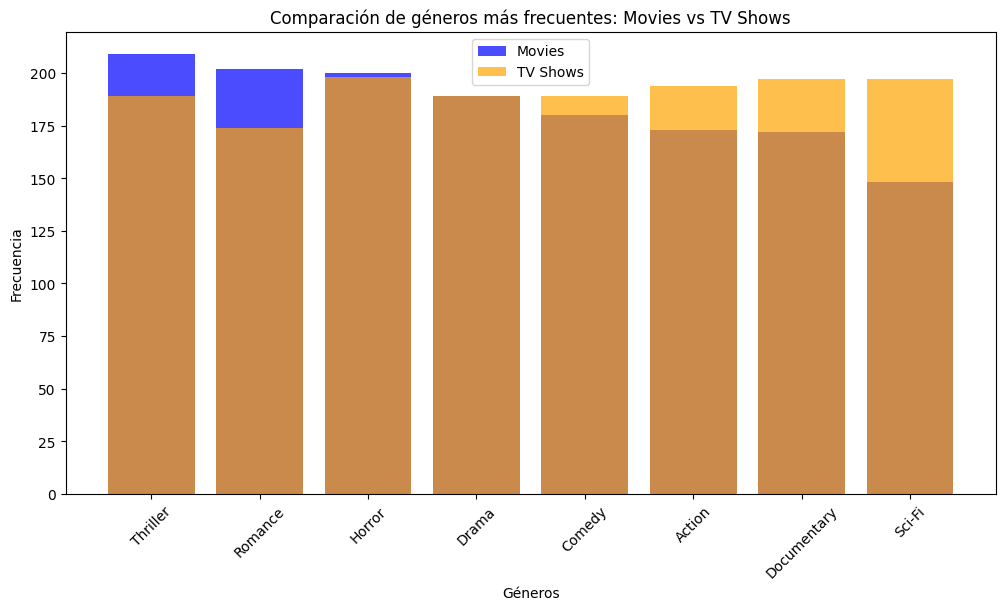

In [23]:
# Filtrar por Movies y TV Shows
movies_data = data[data['Type'] == 'Movie']
tvshows_data = data[data['Type'] == 'TV Show']

# Contar géneros más frecuentes para Movies
top_genres_movies = movies_data['Genre'].value_counts().head(10)
print("Géneros más frecuentes en películas:")
print(top_genres_movies)

# Contar géneros más frecuentes para TV Shows
top_genres_tvshows = tvshows_data['Genre'].value_counts().head(10)
print("\nGéneros más frecuentes en programas de TV:")
print(top_genres_tvshows)

# Visualización
plt.figure(figsize=(12, 6))
plt.bar(top_genres_movies.index, top_genres_movies.values, alpha=0.7, label='Movies', color='blue')
plt.bar(top_genres_tvshows.index, top_genres_tvshows.values, alpha=0.7, label='TV Shows', color='orange')
plt.title("Comparación de géneros más frecuentes: Movies vs TV Shows")
plt.ylabel("Frecuencia")
plt.xlabel("Géneros")
plt.xticks(rotation=45)
plt.legend()

# Guardar la imagen
output_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Respuestas_Hipotesis_Principal.png"
plt.savefig(output_path, bbox_inches="tight")
plt.show()

## Hipóstesis Secundaria

### La mayoría de las producciones recientes (2010-2023) tienen una clasificación orientada al público joven (PG-13, TV-14).

Análisis y Código:

- Filtraremos producciones entre 2010 y 2023.
- Contaremos las clasificaciones (Rating) en ese rango.
- Verificaremos si PG-13 y TV-14 son las más frecuentes.

Clasificaciones más frecuentes (2010-2023):
Rating
PG-13    91
R        82
TV-14    80
TV-PG    76
G        75
TV-MA    69
PG       67
Name: count, dtype: int64

Clasificaciones orientadas al público joven:
Rating
PG-13    91
TV-14    80
Name: count, dtype: int64


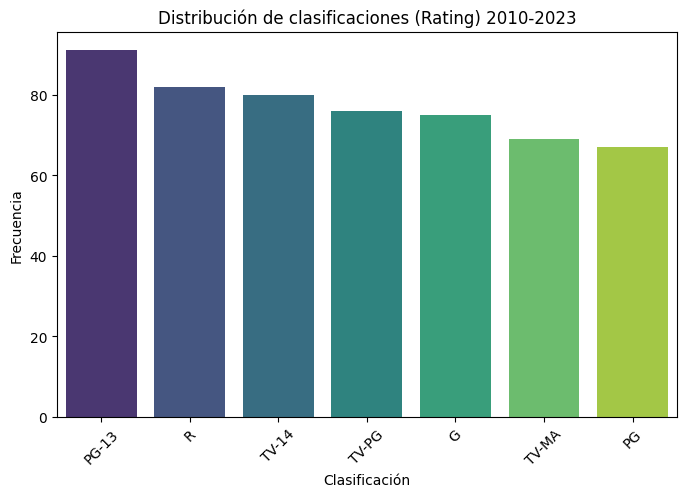

In [24]:
# Filtrar producciones entre 2010 y 2023
recent_productions = data[(data['Release Year'] >= 2010) & (data['Release Year'] <= 2023)]

# Contar clasificaciones (Rating)
rating_counts = recent_productions['Rating'].value_counts()

# Filtrar solo clasificaciones orientadas al público joven
target_ratings = ['PG-13', 'TV-14']
young_audience_count = rating_counts[rating_counts.index.isin(target_ratings)]

print("Clasificaciones más frecuentes (2010-2023):")
print(rating_counts)

print("\nClasificaciones orientadas al público joven:")
print(young_audience_count)

# Visualización
plt.figure(figsize=(8, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, hue=rating_counts.index, palette="viridis", dodge=False, legend=False)
plt.title("Distribución de clasificaciones (Rating) 2010-2023")
plt.xlabel("Clasificación")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)

# Guardar la imagen
output_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Respuestas_Hipotesis_Secundaria.png"
plt.savefig(output_path, bbox_inches="tight")
plt.show()


Muestra la duración promedio de títulos agrupados por Genre ordenados de mayor a menor.

## Preguntas a Responder

Pregunta 1: ¿Qué géneros son más frecuentes en las películas comparado con los programas de TV?

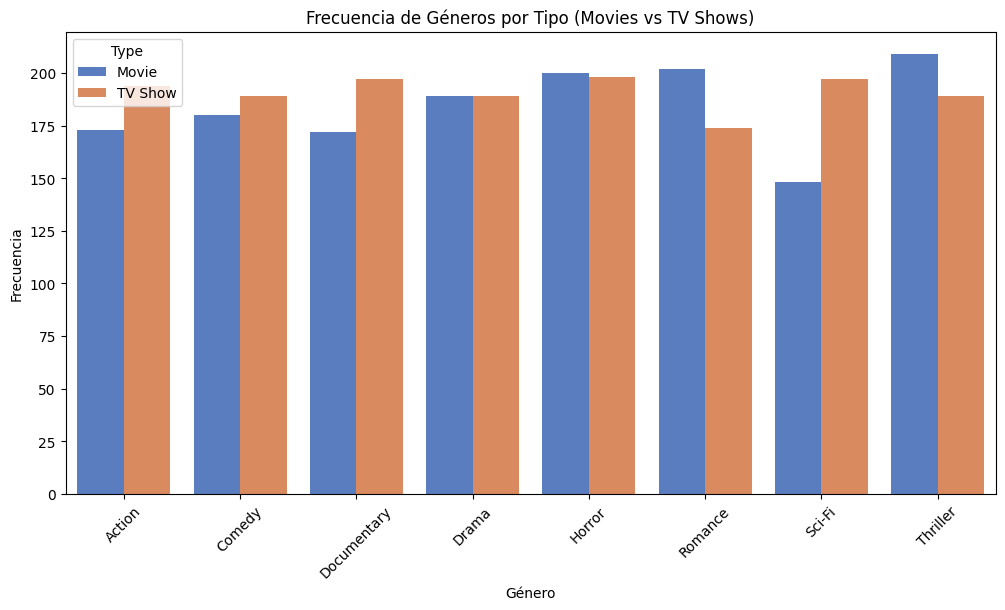

In [31]:
# Conteo de géneros por 'Type' (Movies vs TV Shows)
genre_count = data.groupby(['Type', 'Genre']).size().reset_index(name='Count')

# Diagrama de barras para mostrar géneros más frecuentes por 'Type'
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Count', hue='Type', data=genre_count, palette="muted")
plt.title("Frecuencia de Géneros por Tipo (Movies vs TV Shows)")
plt.xlabel("Género")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)

# Guardar la imagen
output_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Respuestas_Frecuencia_Generos_Tipo.png"
plt.savefig(output_path, bbox_inches="tight")
plt.show()

Pregunta 2: ¿Cómo ha variado la producción de contenido a lo largo de los años (1950-2023)?

Análisis y Código:

- Contar la cantidad de producciones por año (Release Year).
- Visualizar la tendencia.

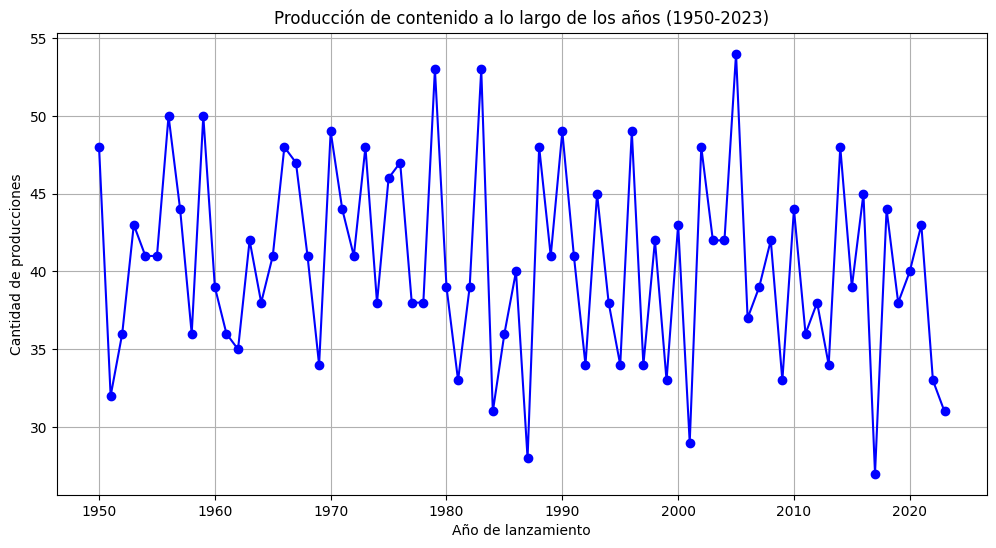

In [26]:
# Contar producciones por año
content_by_year = data['Release Year'].value_counts().sort_index()

# Visualización
plt.figure(figsize=(12, 6))
plt.plot(content_by_year.index, content_by_year.values, marker='o', linestyle='-', color='blue')
plt.title("Producción de contenido a lo largo de los años (1950-2023)")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de producciones")
plt.grid(True)

# Guardar la imagen
output_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Respuestas_Produccion_Contenido_1950_2023.png"
plt.savefig(output_path, bbox_inches="tight")
plt.show()


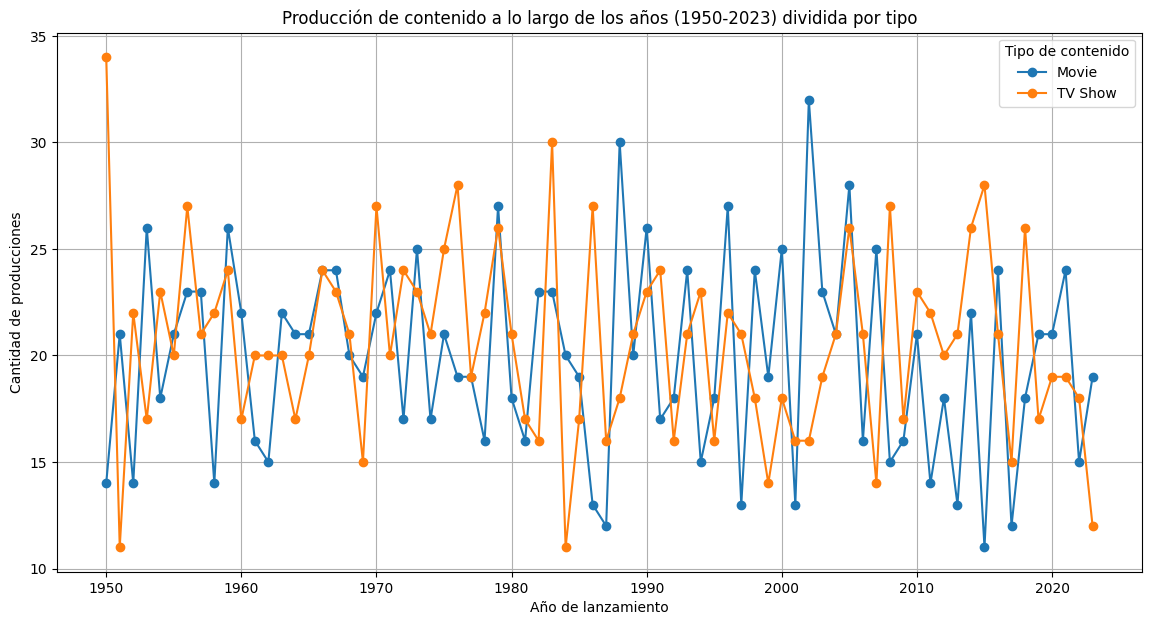

In [35]:
# Agrupar por año y tipo y contar las producciones
content_by_year_type = (
    data.groupby(['Release Year', 'Type']).size()
    .reset_index(name='Count')
    .sort_values(by='Release Year')
)

# Visualización
plt.figure(figsize=(14, 7))

# Generar una línea para cada tipo
for tipo in content_by_year_type['Type'].unique():
    subset = content_by_year_type[content_by_year_type['Type'] == tipo]
    plt.plot(subset['Release Year'], subset['Count'], marker='o', linestyle='-', label=tipo)

# Títulos y etiquetas
plt.title("Producción de contenido a lo largo de los años (1950-2023) dividida por tipo")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de producciones")
plt.grid(True)
plt.legend(title="Tipo de contenido")  # Agregar leyenda

# Guardar la imagen
output_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Respuestas_Produccion_Contenido_1950_2023_II.png"
plt.savefig(output_path, bbox_inches="tight")
plt.show()

In [32]:
# Agrupar por Release Year y contar la cantidad de producciones
productions_by_year = data['Release Year'].value_counts().sort_index()

# Identificar los años con picos de producción
picos_produccion = productions_by_year.nlargest(5)

# Mostrar los años con los valores máximos
picos_produccion

Release Year
2005    54
1979    53
1983    53
1956    50
1959    50
Name: count, dtype: int64

Pregunta 3: ¿Qué clasificaciones por edades (Rating) son más comunes y cómo se distribuyen por tipo?

Análisis y Código:

- Contar las clasificaciones (Rating) generales.
- Comparar las clasificaciones por tipo (Movies vs TV Shows)

Clasificaciones más comunes:
Rating
TV-14    441
R        441
PG       434
TV-PG    430
PG-13    422
TV-MA    418
G        414
Name: count, dtype: int64

Distribución de clasificaciones por Type:
Type    Movie  TV Show
Rating                
G         189      225
PG        204      230
PG-13     218      204
R         222      219
TV-14     215      226
TV-MA     204      214
TV-PG     221      209


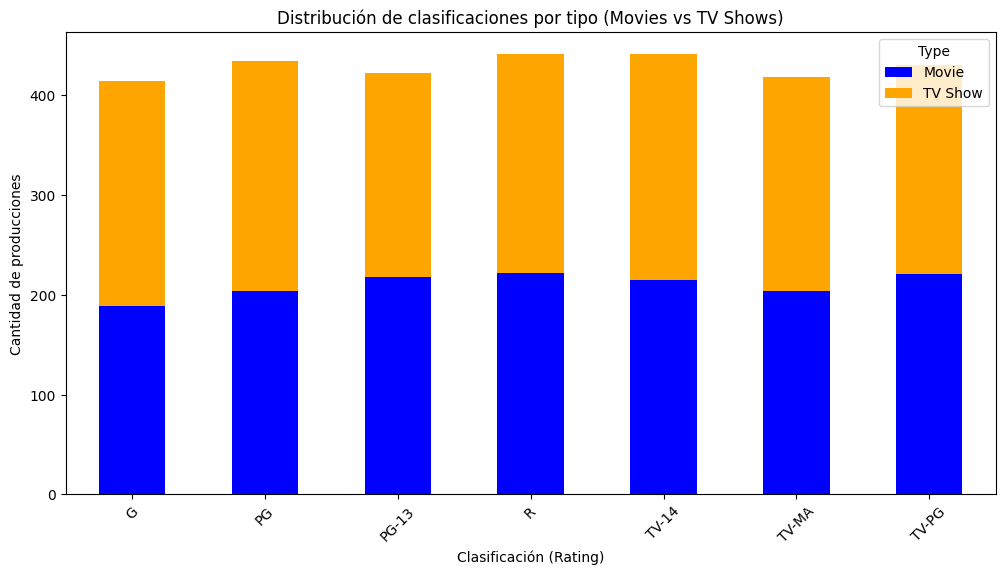

In [27]:
# Clasificaciones más comunes (global)
rating_counts = data['Rating'].value_counts()
print("Clasificaciones más comunes:")
print(rating_counts)

# Distribución por Type
rating_by_type = pd.crosstab(data['Rating'], data['Type'])

print("\nDistribución de clasificaciones por Type:")
print(rating_by_type)

# Visualización
rating_by_type.plot(kind='bar', figsize=(12, 6), stacked=True, color=['blue', 'orange'])
plt.title("Distribución de clasificaciones por tipo (Movies vs TV Shows)")
plt.xlabel("Clasificación (Rating)")
plt.ylabel("Cantidad de producciones")
plt.legend(title="Type")
plt.xticks(rotation=45)

# Guardar la imagen
output_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Respuestas_Distribucion_Clasificaciones_Tipo.png"
plt.savefig(output_path, bbox_inches="tight")
plt.show()


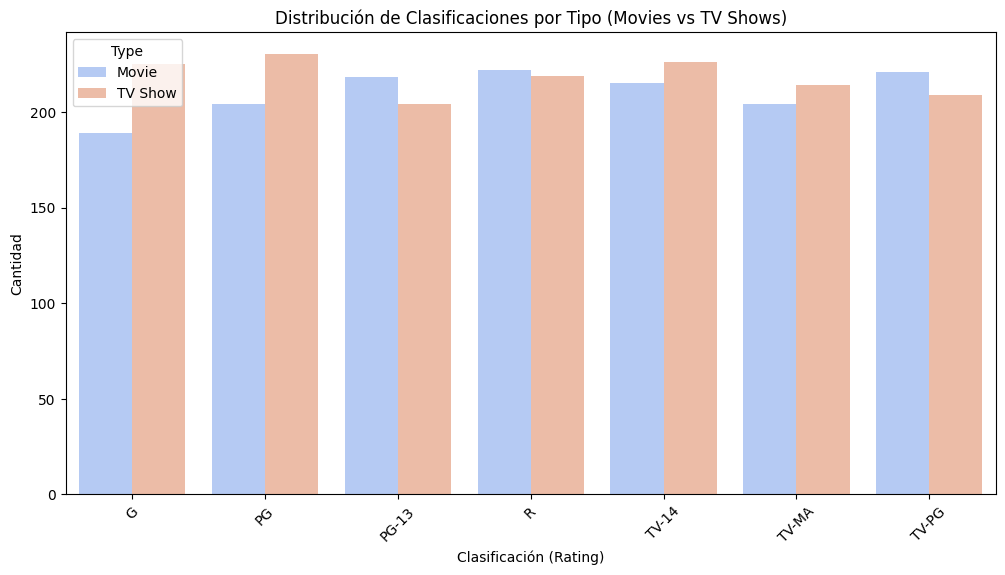

In [28]:
# Conteo de clasificaciones por 'Type'
rating_distribution = data.groupby(['Type', 'Rating']).size().reset_index(name='Count')

# Diagrama de barras apiladas por 'Type'
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Count', hue='Type', data=rating_distribution, palette="coolwarm")
plt.title("Distribución de Clasificaciones por Tipo (Movies vs TV Shows)")
plt.xlabel("Clasificación (Rating)")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)

# Guardar la imagen
output_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Respuestas_Distribucion_Clasificaciones_Tipo_II.png"
plt.savefig(output_path, bbox_inches="tight")
plt.show()

Pregunta 4: ¿Cuáles son los países que más producen contenido en Netflix?

Análisis y Código:

- Contar la cantidad de producciones por país (Country).
- Visualizar los países más destacados.

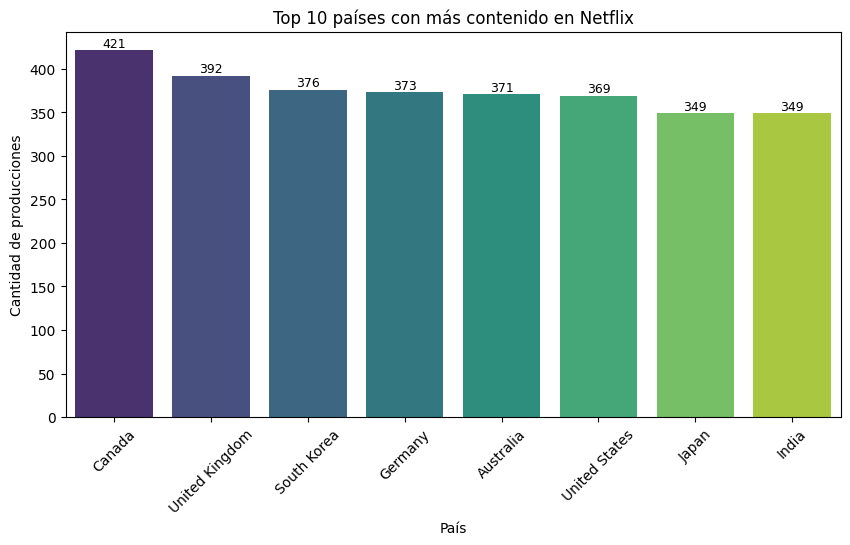

In [29]:
# Países con más contenido
top_countries = data['Country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, hue=top_countries.index, palette="viridis", dodge=False, legend=False)
plt.title("Top 10 países con más contenido en Netflix")
plt.xlabel("País")
plt.ylabel("Cantidad de producciones")
plt.xticks(rotation=45)

# Mostrar valores encima de las barras
for i, value in enumerate(top_countries.values):
    plt.text(i, value, f"{value}", ha="center", va="bottom", fontsize=9)

# Guardar la imagen
output_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Respuestas_Top_10_Paises_Mas_Contenido.png"
plt.savefig(output_path, bbox_inches="tight")
plt.show()


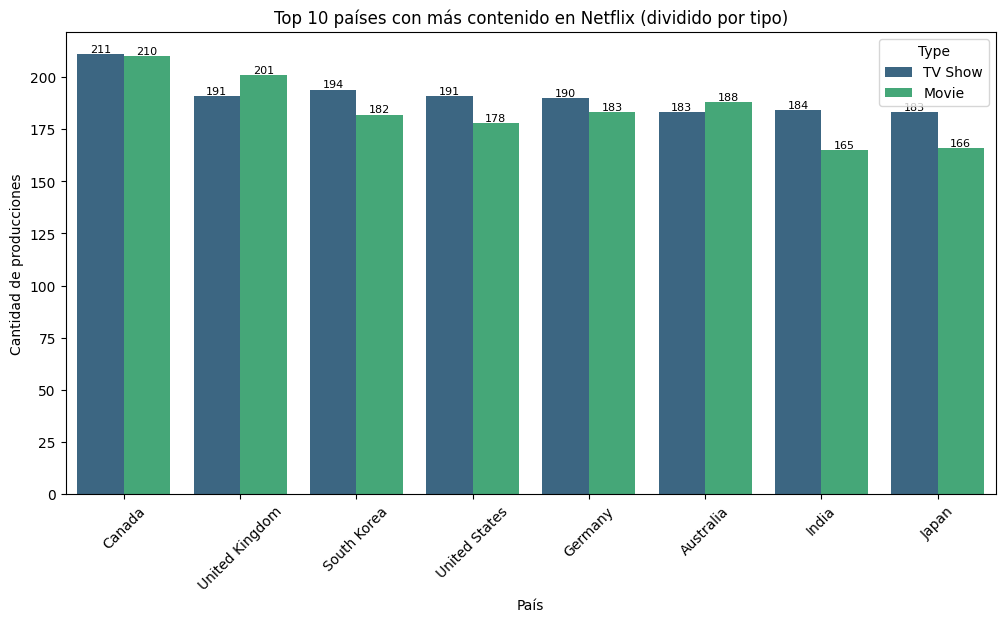

In [33]:
# Agrupar por país y tipo y contar las ocurrencias
top_countries_type = (
    data.groupby(['Country', 'Type']).size()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)

# Filtrar solo los 10 países con más contenido total
top_10_countries = data['Country'].value_counts().head(10).index
filtered_data = top_countries_type[top_countries_type['Country'].isin(top_10_countries)]

# Configuración del gráfico
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Country',
    y='Count',
    hue='Type',
    data=filtered_data,
    palette="viridis"
)

# Títulos y etiquetas
plt.title("Top 10 países con más contenido en Netflix (dividido por tipo)")
plt.xlabel("País")
plt.ylabel("Cantidad de producciones")
plt.xticks(rotation=45)

# Mostrar valores encima de las barras
for bar in plt.gca().containers:
    plt.bar_label(bar, fmt='%d', fontsize=8)

# Guardar la imagen
output_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Respuestas_Top_10_Paises_Mas_Contenido_II.png"
plt.savefig(output_path, bbox_inches="tight")
plt.show()


Pregunta 5: ¿Existe una diferencia notable en la duración promedio entre géneros?

Análisis y Código:

- Agrupar por Genre y calcular la duración promedio.
- Identificar diferencias notables.

Duración promedio por género:
Genre
Comedy         426.219512
Documentary    424.517615
Sci-Fi         422.695652
Action         392.267030
Romance        377.265957
Drama          363.888889
Horror         357.080402
Thriller       350.959799
Name: Duration, dtype: float64


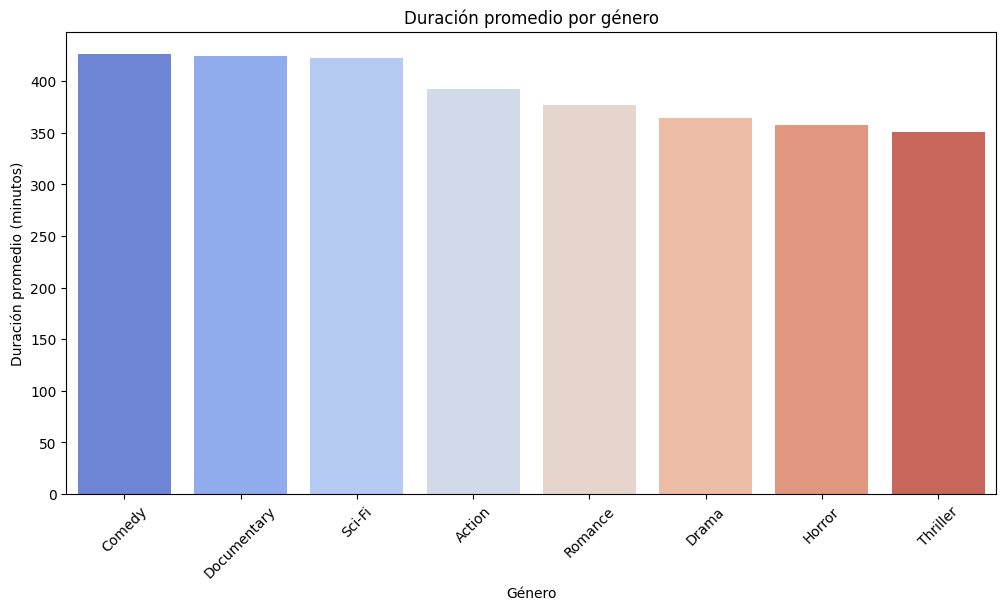

In [30]:
# Duración promedio por género
duration_by_genre = data.groupby('Genre')['Duration'].mean().sort_values(ascending=False)

print("Duración promedio por género:")
print(duration_by_genre)

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(x=duration_by_genre.index, y=duration_by_genre.values, hue=duration_by_genre.index, palette="coolwarm", legend=False)
plt.title("Duración promedio por género")
plt.xlabel("Género")
plt.ylabel("Duración promedio (minutos)")
plt.xticks(rotation=45)

# Guardar la imagen
output_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Respuestas_Duracion_Promedio_Genero.png"
plt.savefig(output_path, bbox_inches="tight")
plt.show()


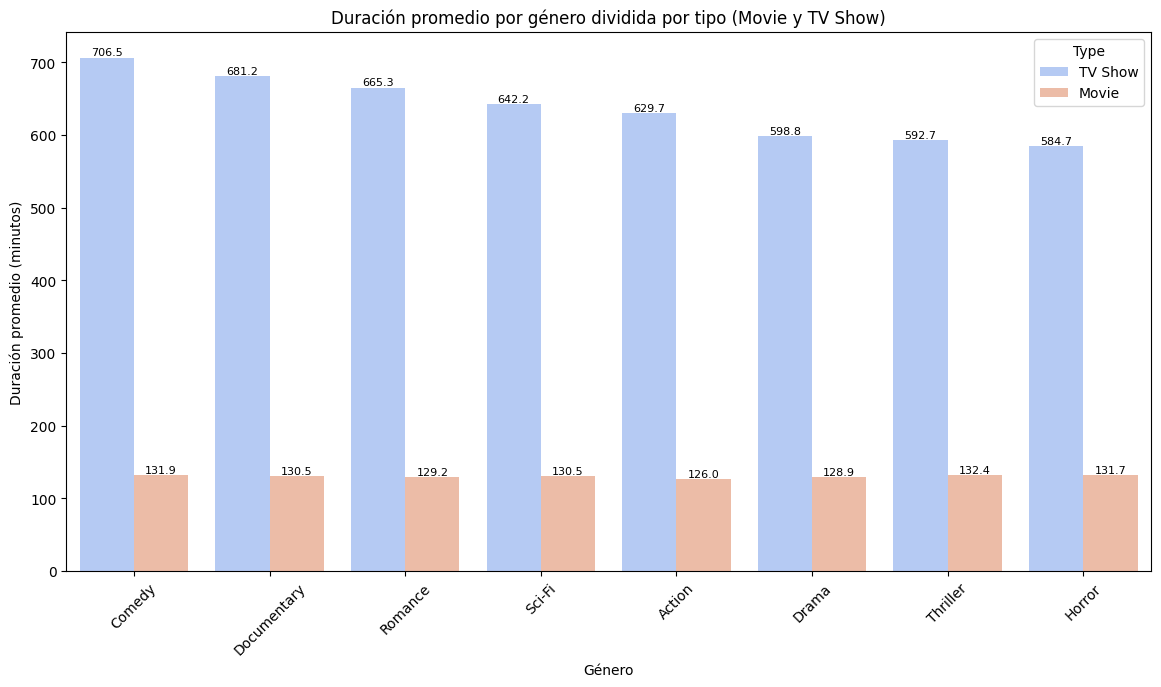

In [34]:
# Agrupar por género y tipo, calcular la duración promedio
duration_by_genre_type = (
    data.groupby(['Genre', 'Type'])['Duration']
    .mean()
    .reset_index()
    .sort_values(by='Duration', ascending=False)
)

# Visualización
plt.figure(figsize=(14, 7))
sns.barplot(
    x='Genre',
    y='Duration',
    hue='Type',  # Dividir por 'Movie' y 'TV Show'
    data=duration_by_genre_type,
    palette="coolwarm"
)

# Títulos y etiquetas
plt.title("Duración promedio por género dividida por tipo (Movie y TV Show)")
plt.xlabel("Género")
plt.ylabel("Duración promedio (minutos)")
plt.xticks(rotation=45)

# Mostrar valores encima de las barras
for bar in plt.gca().containers:
    plt.bar_label(bar, fmt='%.1f', fontsize=8)

# Guardar la imagen
output_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Respuestas_Duracion_Promedio_Genero_II.png"
plt.savefig(output_path, bbox_inches="tight")
plt.show()

In [36]:
duration_check = data.groupby(['Type'])['Duration'].describe()
print(duration_check)


          count        mean         std   min    25%    50%     75%     max
Type                                                                       
Movie    1473.0  130.191446   27.442158  60.0  118.0  141.0   141.0   180.0
TV Show  1527.0  637.291421  636.527438  60.0  117.5  175.0  1200.0  1800.0


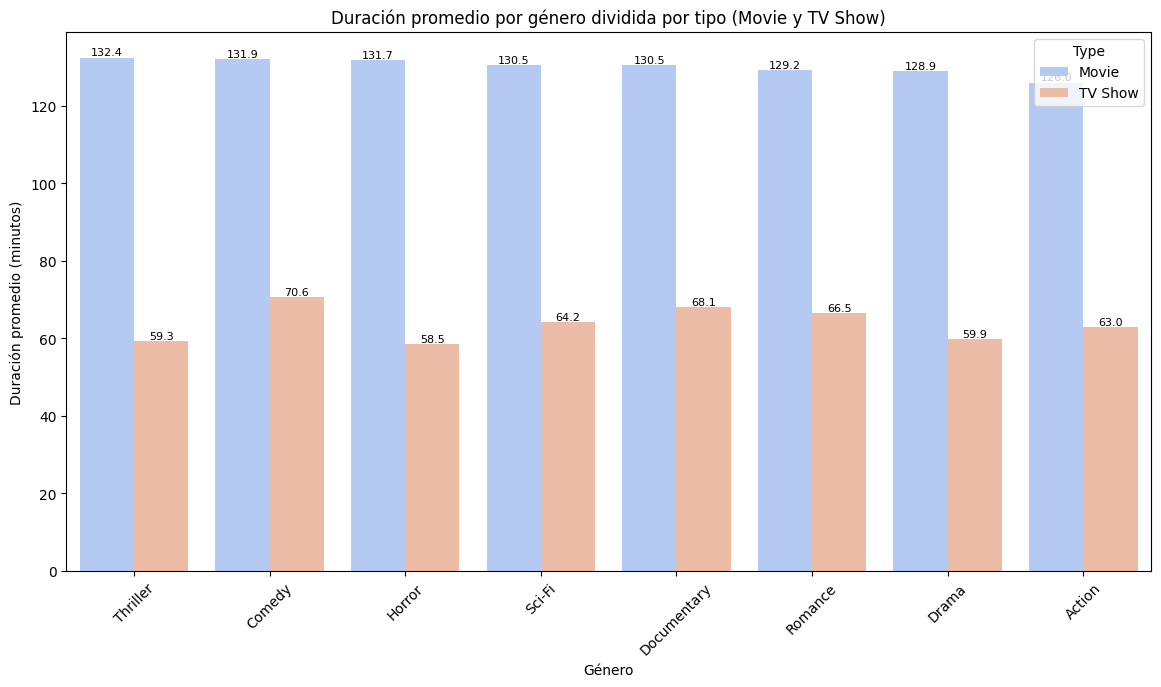

In [38]:
data['Adjusted_Duration'] = data.apply(
    lambda x: x['Duration'] / 10 if x['Type'] == 'TV Show' else x['Duration'], axis=1
)

# Duración promedio por género y tipo usando la nueva columna ajustada
duration_by_genre_type = (
    data.groupby(['Genre', 'Type'])['Adjusted_Duration']
    .mean()
    .reset_index()
    .sort_values(by='Adjusted_Duration', ascending=False)
)

# Visualización
plt.figure(figsize=(14, 7))
sns.barplot(
    x='Genre',
    y='Adjusted_Duration',
    hue='Type',
    data=duration_by_genre_type,
    palette="coolwarm"
)

# Etiquetas
plt.title("Duración promedio por género dividida por tipo (Movie y TV Show)")
plt.xlabel("Género")
plt.ylabel("Duración promedio (minutos)")
plt.xticks(rotation=45)

# Mostrar valores encima de las barras
for bar in plt.gca().containers:
    plt.bar_label(bar, fmt='%.1f', fontsize=8)

plt.show()